<a href="https://colab.research.google.com/github/perezlenin1984/Pruebas_Icfes_2023/blob/main/Version_01/Prueba_Saber_V1_3_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TALENTOTECH Y MINTIC**

**BOOTCAMP: ANÁLISIS Y VISUALIZACIÓN DE DATOS**

**PROYECTO: PRUEBAS SABER 11-2023 BOGOTÁ**

**NOTEBOOK VERSIÓN 1.3: KNN eliminando todos los valores nulos**

**Profesor:** Ingeniero José Albeiro Montes Gil

**Equipo de trabajo:**

Lenin Hernando Pérez

Diana Carolina Valencia

Edwin Tumay Mojica

**Importar las bibliotecas**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

**Cargar los datos**

In [2]:
df1 = pd.read_excel('/content/Icfes2023-A.xlsx')
df2 = pd.read_excel('/content/Icfes2023-B.xlsx')

In [3]:
#Obtener las columnas que tienen en común df1 y df2
col_comun = list(set(df1.columns)&set(df2.columns))
#Preparar los nuevos df de acuerdo con las columnas que tienen en común
df1_comun = df1[col_comun]
df2_comun = df2[col_comun]
#Concatenar df1_comun con df2_comun
merged_df = pd.concat([df1_comun, df2_comun], ignore_index=True)
#Información básica de las columnas de merged_df
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80847 entries, 0 to 80846
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   FAMI_TIENESERVICIOTV           75913 non-null  object        
 1   PUNT_SOCIALES_CIUDADANAS       80847 non-null  int64         
 2   COLE_CODIGO_ICFES              80847 non-null  int64         
 3   ESTU_HORASSEMANATRABAJA        77633 non-null  object        
 4   PUNT_GLOBAL                    80847 non-null  int64         
 5   FAMI_CUARTOSHOGAR              77571 non-null  object        
 6   ESTU_NSE_ESTABLECIMIENTO       80847 non-null  int64         
 7   COLE_CALENDARIO                80847 non-null  object        
 8   FAMI_COMECARNEPESCADOHUEVO     75766 non-null  object        
 9   COLE_NOMBRE_ESTABLECIMIENTO    80847 non-null  object        
 10  ESTU_DEPTO_RESIDE              80847 non-null  object        
 11  COLE_SEDE_PRINC

**Preparación de los datos**

In [4]:
seleccionColumnas = ["ESTU_PRESENTACIONSABADO","FAMI_EDUCACIONMADRE",
                    "FAMI_TIENESERVICIOTV","COLE_CARACTER","ESTU_GENERO","FAMI_TIENEHORNOMICROOGAS",
                    "FAMI_PERSONASHOGAR","ESTU_TIPOREMUNERACION","FAMI_TIENECONSOLAVIDEOJUEGOS",
                    "ESTU_HORASSEMANATRABAJA","FAMI_EDUCACIONPADRE","FAMI_TIENEAUTOMOVIL",
                    "COLE_JORNADA","COLE_NATURALEZA","FAMI_TRABAJOLABORMADRE","ESTU_NSE_INDIVIDUAL",
                    "FAMI_COMECEREALFRUTOSLEGUMBRE","FAMI_TIENECOMPUTADOR",
                    "FAMI_CUARTOSHOGAR","FAMI_TIENEMOTOCICLETA","FAMI_COMELECHEDERIVADOS",
                    "FAMI_TIENEINTERNET","ESTU_DEDICACIONLECTURADIARIA","COLE_AREA_UBICACION",
                    "FAMI_SITUACIONECONOMICA","FAMI_ESTRATOVIVIENDA","FAMI_TRABAJOLABORPADRE","ESTU_FECHANACIMIENTO",
                     "COLE_GENERO","FAMI_COMECARNEPESCADOHUEVO","PUNT_GLOBAL", "FAMI_TIENELAVADORA","COLE_CALENDARIO",
                     "ESTU_DEDICACIONINTERNET","ESTU_NSE_ESTABLECIMIENTO","FAMI_NUMLIBROS",'COLE_BILINGUE']
df_icfes = merged_df[seleccionColumnas]
print(df_icfes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80847 entries, 0 to 80846
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ESTU_PRESENTACIONSABADO        80699 non-null  object        
 1   FAMI_EDUCACIONMADRE            76133 non-null  object        
 2   FAMI_TIENESERVICIOTV           75913 non-null  object        
 3   COLE_CARACTER                  77102 non-null  object        
 4   ESTU_GENERO                    80847 non-null  object        
 5   FAMI_TIENEHORNOMICROOGAS       77632 non-null  object        
 6   FAMI_PERSONASHOGAR             77721 non-null  object        
 7   ESTU_TIPOREMUNERACION          77520 non-null  object        
 8   FAMI_TIENECONSOLAVIDEOJUEGOS   77584 non-null  object        
 9   ESTU_HORASSEMANATRABAJA        77633 non-null  object        
 10  FAMI_EDUCACIONPADRE            76179 non-null  object        
 11  FAMI_TIENEAUTOM

In [5]:
data_icfes = df_icfes.dropna()
data_icfes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56666 entries, 4 to 80837
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ESTU_PRESENTACIONSABADO        56666 non-null  object        
 1   FAMI_EDUCACIONMADRE            56666 non-null  object        
 2   FAMI_TIENESERVICIOTV           56666 non-null  object        
 3   COLE_CARACTER                  56666 non-null  object        
 4   ESTU_GENERO                    56666 non-null  object        
 5   FAMI_TIENEHORNOMICROOGAS       56666 non-null  object        
 6   FAMI_PERSONASHOGAR             56666 non-null  object        
 7   ESTU_TIPOREMUNERACION          56666 non-null  object        
 8   FAMI_TIENECONSOLAVIDEOJUEGOS   56666 non-null  object        
 9   ESTU_HORASSEMANATRABAJA        56666 non-null  object        
 10  FAMI_EDUCACIONPADRE            56666 non-null  object        
 11  FAMI_TIENEAUTOMOVIL 

In [6]:
data_icfes = data_icfes.drop_duplicates()
data_icfes

,ESTU_PRESENTACIONSABADO,FAMI_EDUCACIONMADRE,FAMI_TIENESERVICIOTV,COLE_CARACTER,ESTU_GENERO,FAMI_TIENEHORNOMICROOGAS,FAMI_PERSONASHOGAR,ESTU_TIPOREMUNERACION,FAMI_TIENECONSOLAVIDEOJUEGOS,ESTU_HORASSEMANATRABAJA,...,ESTU_FECHANACIMIENTO,COLE_GENERO,FAMI_COMECARNEPESCADOHUEVO,PUNT_GLOBAL,FAMI_TIENELAVADORA,COLE_CALENDARIO,ESTU_DEDICACIONINTERNET,ESTU_NSE_ESTABLECIMIENTO,FAMI_NUMLIBROS,COLE_BILINGUE
4,No,Postgrado,Si,ACADÉMICO,M,Si,3 a 4,Si; en efectivo,Si,0,...,2006-01-21,MIXTO,Todos o casi todos los días,328,Si,A,Más de 3 horas,3,26 A 100 LIBROS,N
5,No,Secundaria (Bachillerato) completa,Si,ACADÉMICO,M,Si,3 a 4,No,No,0,...,2005-10-16,MIXTO,Todos o casi todos los días,304,Si,A,Entre 1 y 3 horas,3,11 A 25 LIBROS,N
8,No,Postgrado,Si,ACADÉMICO,F,No,3 a 4,No,No,0,...,2006-08-15,MIXTO,3 a 5 veces por semana,420,Si,A,Más de 3 horas,3,26 A 100 LIBROS,N
9,No,Postgrado,Si,ACADÉMICO,M,Si,5 a 6,No,Si,Entre 11 y 20 horas,...,2007-01-18,MIXTO,Todos o casi todos los días,281,Si,A,Más de 3 horas,3,0 A 10 LIBROS,N
10,No,Educación profesional completa,No,ACADÉMICO,M,No,3 a 4,No,No,Menos de 10 horas,...,2006-08-01,MIXTO,3 a 5 veces por semana,311,Si,A,Entre 30 y 60 minutos,3,0 A 10 LIBROS,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80833,No,Educación profesional incompleta,Si,ACADÉMICO,F,Si,1 a 2,Si; en efectivo,No,Menos de 10 horas,...,2005-04-08,FEMENINO,3 a 5 veces por semana,285,Si,B,Entre 30 y 60 minutos,4,11 A 25 LIBROS,N
80834,No,Educación profesional completa,Si,ACADÉMICO,F,Si,3 a 4,No,No,Entre 11 y 20 horas,...,2004-08-25,FEMENINO,Todos o casi todos los días,312,Si,B,Entre 30 y 60 minutos,4,26 A 100 LIBROS,N
80835,No,Educación profesional completa,Si,ACADÉMICO,F,Si,3 a 4,No,Si,0,...,2005-06-22,FEMENINO,Todos o casi todos los días,366,Si,B,Entre 1 y 3 horas,4,MÁS DE 100 LIBROS,N
80836,No,Postgrado,Si,ACADÉMICO,F,Si,3 a 4,No,No,0,...,2004-11-04,FEMENINO,Todos o casi todos los días,407,Si,B,Entre 1 y 3 horas,4,MÁS DE 100 LIBROS,N


**Transformación de los datos**


In [7]:
frecuencia = {'Nunca o rara vez comemos eso':0, '1 o 2 veces por semana': 1, '3 a 5 veces por semana': 2, 'Todos o casi todos los días': 3}
data_icfes['FAMI_COMELECHEDERIVADOS'] = data_icfes['FAMI_COMELECHEDERIVADOS'].map(frecuencia)

In [8]:
data_icfes['FAMI_COMECARNEPESCADOHUEVO'] = data_icfes['FAMI_COMECARNEPESCADOHUEVO'].map(frecuencia)

In [9]:
data_icfes['FAMI_COMECEREALFRUTOSLEGUMBRE'] = data_icfes['FAMI_COMECEREALFRUTOSLEGUMBRE'].map(frecuencia)

In [10]:
educacion = {'No sabe':0,'No Aplica':1,'Ninguno':2, 'Primaria incompleta':3, 'Primaria completa':4,'Secundaria (Bachillerato) incompleta':5,
                      'Secundaria (Bachillerato) completa':6,'Técnica o tecnológica incompleta':7,'Técnica o tecnológica completa':8,
                     'Educación profesional incompleta':9,'Educación profesional completa':10,'Postgrado':11}
data_icfes['FAMI_EDUCACIONMADRE'] = data_icfes['FAMI_EDUCACIONMADRE'].map(educacion)
data_icfes['FAMI_EDUCACIONPADRE'] = data_icfes['FAMI_EDUCACIONPADRE'].map(educacion)

In [11]:
labor = {'Trabaja como profesional (por ejemplo médico; abogado; ingeniero)': 0,
         'Es operario de máquinas o conduce vehículos (taxita; chofer)': 1,
         'Trabaja por cuenta propia (por ejemplo plomero; electricista)': 2,
         'No sabe': 3,
         'No aplica': 4,
         'Es dueño de un negocio pequeño (tiene pocos empleados o no tiene; por ejemplo tienda; papelería; etc': 5,
         'Trabaja como personal de limpieza; mantenimiento; seguridad o construcción': 6,
         'Es vendedor o trabaja en atención al público': 7,
         'Tiene un trabajo de tipo auxiliar administrativo (por ejemplo; secretario o asistente)': 8,
         'Es dueño de un negocio grande; tiene un cargo de nivel directivo o gerencial': 9,
         'Trabaja en el hogar; no trabaja o estudia': 10,
         'Pensionado': 11,
         'Es agricultor; pesquero o jornalero': 12}
data_icfes['FAMI_TRABAJOLABORPADRE'] = data_icfes['FAMI_TRABAJOLABORPADRE'].map(labor)
data_icfes['FAMI_TRABAJOLABORMADRE'] = data_icfes['FAMI_TRABAJOLABORMADRE'].map(labor)

In [12]:
si_no = {'Si': 1, 'No': 0}
data_icfes['ESTU_PRESENTACIONSABADO'] = data_icfes['ESTU_PRESENTACIONSABADO'].map(si_no)
data_icfes['FAMI_TIENESERVICIOTV'] = data_icfes['FAMI_TIENESERVICIOTV'].map(si_no)
data_icfes['FAMI_TIENEHORNOMICROOGAS'] = data_icfes['FAMI_TIENEHORNOMICROOGAS'].map(si_no)
data_icfes['FAMI_TIENECONSOLAVIDEOJUEGOS'] = data_icfes['FAMI_TIENECONSOLAVIDEOJUEGOS'].map(si_no)
data_icfes['FAMI_TIENEAUTOMOVIL'] = data_icfes['FAMI_TIENEAUTOMOVIL'].map(si_no)
data_icfes['FAMI_TIENECOMPUTADOR'] = data_icfes['FAMI_TIENECOMPUTADOR'].map(si_no)
data_icfes['FAMI_TIENEMOTOCICLETA'] = data_icfes['FAMI_TIENEMOTOCICLETA'].map(si_no)
data_icfes['FAMI_TIENEINTERNET'] = data_icfes['FAMI_TIENEINTERNET'].map(si_no)
data_icfes['FAMI_TIENELAVADORA'] = data_icfes['FAMI_TIENELAVADORA'].map(si_no)

In [13]:
ese_ene = {'S': 1, 'N': 0}
data_icfes['COLE_BILINGUE'] = data_icfes['COLE_BILINGUE'].map(ese_ene)

In [14]:
genero = {'M': 1, 'F': 0}
data_icfes['ESTU_GENERO'] = data_icfes['ESTU_GENERO'].map(genero)

In [15]:
naturaleza = {'OFICIAL':0, 'NO OFICIAL': 1}
data_icfes['COLE_NATURALEZA'] = data_icfes['COLE_NATURALEZA'].map(naturaleza)

In [16]:
area = {'URBANO': 0, 'RURAL': 1}
data_icfes['COLE_AREA_UBICACION'] = data_icfes['COLE_AREA_UBICACION'].map(area)

In [17]:
caracter = {'NO APLICA':0, 'TÉCNICO': 1, 'ACADÉMICO': 2, 'TÉCNICO/ACADÉMICO': 3}
data_icfes['COLE_CARACTER'] = data_icfes['COLE_CARACTER'].map(caracter)

In [18]:
personas_hogar = {'1 a 2':1, '3 a 4': 2, '5 a 6': 3, '7 a 8': 4, '9 o más': 5}
data_icfes['FAMI_PERSONASHOGAR'] = data_icfes['FAMI_PERSONASHOGAR'].map(personas_hogar)

In [19]:
remuneracion = {'No':0, 'Si; en especie': 1, 'Si; en efectivo': 2, 'Si; en efectivo y especie': 3}
data_icfes['ESTU_TIPOREMUNERACION'] = data_icfes['ESTU_TIPOREMUNERACION'].map(remuneracion)

In [20]:
horas_semana = {'0':0, 'Menos de 10 horas': 1, 'Entre 11 y 20 horas': 2, 'Entre 21 y 30 horas': 3, 'Más de 30 horas': 4}
data_icfes['ESTU_HORASSEMANATRABAJA'] = data_icfes['ESTU_HORASSEMANATRABAJA'].map(horas_semana)

In [21]:
jornada = {'SABATINA':0, 'NOCHE': 1, 'TARDE': 2, 'UNICA': 3, 'MAÑANA': 4, 'COMPLETA': 5}
data_icfes['COLE_JORNADA'] = data_icfes['COLE_JORNADA'].map(jornada)

In [22]:
cuartos = {'Uno': 1, 'Dos': 2, 'Tres': 3, 'Cuatro': 4, 'Cinco': 5, 'Seis o mas': 6}
data_icfes['FAMI_CUARTOSHOGAR'] = data_icfes['FAMI_CUARTOSHOGAR'].map(cuartos)

In [23]:
lectura = {'30 minutos o menos': 0,
           'Entre 30 y 60 minutos': 1,
           'Entre 1 y 2 horas': 2,
           'Más de 2 horas': 3,
           'No leo por entretenimiento': 4}
data_icfes['ESTU_DEDICACIONLECTURADIARIA'] = data_icfes['ESTU_DEDICACIONLECTURADIARIA'].map(lectura)

In [24]:
economia = {'Peor': 0, 'Igual': 1, 'Mejor': 2}
data_icfes['FAMI_SITUACIONECONOMICA'] = data_icfes['FAMI_SITUACIONECONOMICA'].map(economia)

In [25]:
estrato = {'Sin Estrato': 0, 'Estrato 1': 1, 'Estrato 2': 2, 'Estrato 3': 3, 'Estrato 4': 4, 'Estrato 5': 5, 'Estrato 6': 6}
data_icfes['FAMI_ESTRATOVIVIENDA'] = data_icfes['FAMI_ESTRATOVIVIENDA'].map(estrato)

In [26]:
genero_col = {'MIXTO': 0, 'FEMENINO': 1, 'MASCULINO': 2}
data_icfes['COLE_GENERO'] = data_icfes['COLE_GENERO'].map(genero_col)

In [27]:
calendario_col = {'OTRO': 0, 'A': 1, 'B': 2}
data_icfes['COLE_CALENDARIO'] = data_icfes['COLE_CALENDARIO'].map(calendario_col)

In [28]:
internet = {'No Navega Internet': 0, '30 minutos o menos': 1, 'Entre 30 y 60 minutos': 2, 'Entre 1 y 3 horas': 3, 'Más de 3 horas': 4}
data_icfes['ESTU_DEDICACIONINTERNET'] = data_icfes['ESTU_DEDICACIONINTERNET'].map(internet)

In [29]:
num_libros = {'0 A 10 LIBROS': 0, '11 A 25 LIBROS': 1, '26 A 100 LIBROS': 2, 'MÁS DE 100 LIBROS': 3}
data_icfes['FAMI_NUMLIBROS'] = data_icfes['FAMI_NUMLIBROS'].map(num_libros)

In [30]:
#En este fragmento, se determina la edad de cada estudiante
data_icfes['Fecha 2023'] = "2023-12-31" #Se crea esta columna con fecha 31 de diciembre de 2023
data_icfes['Fecha 2023'] = pd.to_datetime(data_icfes['Fecha 2023']) #Se transforma esta columna a un formato fecha
data_icfes['EDAD'] = (data_icfes['Fecha 2023'] - data_icfes['ESTU_FECHANACIMIENTO']) #Se crea otra columna llamada EDAD, que implica restar las columnas Fecha 2023 y Fecha de nacimiento para calcular la edad
data_icfes['EDAD'] = data_icfes['EDAD'].astype('timedelta64[s]') #El resultado tiene unidades de milisegundos, por lo que es necesario convertirlo a segundos
data_icfes['EDAD'] = data_icfes['EDAD'].astype('int64') #La columna EDAD se transforma a un formato numérico entero 64 bits
data_icfes['EDAD'] = data_icfes['EDAD']/31536000 #Se realiza la conversión de segundos a años
data_icfes['EDAD'] = data_icfes['EDAD'].astype('int') #Se transforma la columna EDAD a un formato numérico entero 32 bits
#Una vez lista la columna EDAD, se eliminan las columnas Fecha 2023 y Fecha de nacimiento
data_icfes = data_icfes.drop('Fecha 2023', axis=1)
data_icfes = data_icfes.drop('ESTU_FECHANACIMIENTO', axis=1)

In [31]:
#Esta columna tiene formato de caracter. Hay que transformarla a formato numérico entero
data_icfes['ESTU_NSE_INDIVIDUAL'] = data_icfes['ESTU_NSE_INDIVIDUAL'].astype('int')

In [32]:
#Se clasifican los puntajes en intervalos:
#0: Nivel bajo. Puntajes entre 0 y 100
#1: Nivel medio bajo. Puntajes entre 100 y 200
#2: Nivel medio. Puntajes entre 200 y 300
#3: Nivel medio alto. Puntajes entre 300 y 400
#4: Nivel alto. Puntajes entre 400 y 500
data_icfes['PUNT_GLOBAL'] = pd.cut(data_icfes['PUNT_GLOBAL'], bins=[0, 100, 200, 300, 400, 500], labels=[0,1,2,3,4])
data_icfes['PUNT_GLOBAL'] = data_icfes['PUNT_GLOBAL'].astype('int')

In [33]:
data_icfes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56666 entries, 4 to 80837
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   ESTU_PRESENTACIONSABADO        56666 non-null  int64
 1   FAMI_EDUCACIONMADRE            56666 non-null  int64
 2   FAMI_TIENESERVICIOTV           56666 non-null  int64
 3   COLE_CARACTER                  56666 non-null  int64
 4   ESTU_GENERO                    56666 non-null  int64
 5   FAMI_TIENEHORNOMICROOGAS       56666 non-null  int64
 6   FAMI_PERSONASHOGAR             56666 non-null  int64
 7   ESTU_TIPOREMUNERACION          56666 non-null  int64
 8   FAMI_TIENECONSOLAVIDEOJUEGOS   56666 non-null  int64
 9   ESTU_HORASSEMANATRABAJA        56666 non-null  int64
 10  FAMI_EDUCACIONPADRE            56666 non-null  int64
 11  FAMI_TIENEAUTOMOVIL            56666 non-null  int64
 12  COLE_JORNADA                   56666 non-null  int64
 13  COLE_NATURALEZA      

**Implementación del KNN**

Para este modelo es necesario escalar los datos antes de realizar el entrenamiento y predicciones.

In [34]:
#Importar el algoritmo de KNN (clasificador) y otros métodos de la biblioteca Scikit Learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
#Importar método para escalar
from sklearn.preprocessing import StandardScaler

In [35]:
#Función para dividir el conjunto de datos en 3 subconjuntos: Train (entrenamiento), Validation (validación) y Prueba (Test)
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [36]:
def remove_labels(df, label_name):
    X = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return (X, y)

In [37]:
train_set, val_set, test_set = train_val_test_split(data_icfes)

In [38]:
X_train, y_train = remove_labels(train_set, 'PUNT_GLOBAL')
X_val, y_val = remove_labels(val_set, 'PUNT_GLOBAL')
X_test, y_test = remove_labels(test_set, 'PUNT_GLOBAL')

In [39]:
#Escalado de cada subconjunto
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train).copy()
X_val_scaled = scaler.transform(X_val).copy()
X_test_scaled = scaler.transform(X_test).copy()

A continuación se prepara un gráfico para ver la influencia del número de neighbors en los puntajes de F1-score de los conjuntos de entrenamiento y validación.

In [40]:
f1score_train = []
f1score_val =[]

neighbors = range (1,51)

for n in neighbors:
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_train_scaled, y_train)
  y_train_pred = knn.predict(X_train_scaled)
  f1score_train.append(f1_score(y_train_pred, y_train, average='weighted'))
  y_val_pred = knn.predict(X_val_scaled)
  f1score_val.append(f1_score(y_val_pred, y_val, average='weighted'))

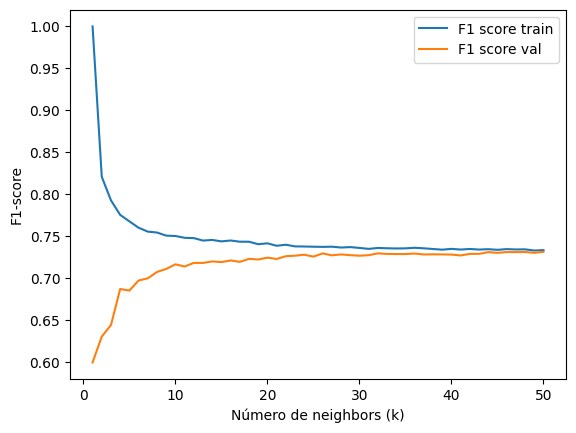

In [41]:
plt.plot(neighbors,f1score_train,label='F1 score train')
plt.plot(neighbors,f1score_val,label='F1 score val')
plt.ylabel('F1-score')
plt.xlabel('Número de neighbors (k)')
plt.legend()

De acuerdo con el gráfico, a medida que aumenta el número de neighbors, los puntajes de F1-score de los conjuntos de entrenamiento y validación convergen (se reduce el overfitting). Por lo tanto, se elige el valor de 51 como el número adecuado de neighbors.

In [42]:
knn_final = KNeighborsClassifier(n_neighbors=51)
knn_final.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=51)

In [43]:
y_train_pred = knn_final.predict(X_train_scaled)

In [44]:
print("F1 score KNN train_set:", f1_score(y_train_pred, y_train, average='weighted'))

F1 score KNN train_set: 0.7327413937373641


In [45]:
y_val_pred = knn_final.predict(X_val_scaled)

In [46]:
print("F1 score KNN val_set:", f1_score(y_val_pred, y_val, average='weighted'))

F1 score KNN val_set: 0.7300203978164286


In [47]:
y_test_pred = knn_final.predict(X_test_scaled)

In [48]:
print("F1 score KNN test_set escalado:", f1_score(y_test_pred, y_test, average='weighted'))

F1 score KNN test_set escalado: 0.7259326500258395
